In [1]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [213]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy as bp
import os
from pmdarima.arima import auto_arima

In [176]:
raw_input_data_path = "/Users/filipecorreia/Desktop/ML_1/Clean_Dataset2.csv"
preprocessed_output_data_path = "/Users/filipecorreia/Desktop/ML_1/Clean_Dataset2.csv"

In [177]:
df=pd.read_csv('/Users/filipecorreia/Desktop/ML_1/Clean_Dataset2.csv')
df.sample(10)

,Unnamed: 0,airline,departure_time,stops,arrival_time,class,duration,days_left,price
238770,238770,5,0,0,5,0,0.197347,0.250000,0.366496
284104,284104,1,1,0,2,0,0.241633,0.500000,0.414886
300079,300079,5,5,0,0,0,0.304490,0.979167,0.327624
61793,61793,3,4,0,2,1,0.163265,0.041667,0.089566
172044,172044,5,4,0,2,1,0.153061,0.270833,0.080818
115779,115779,1,2,0,5,1,0.523878,0.062500,0.122075
204978,204978,5,4,0,1,1,0.433673,0.604167,0.035895
131129,131129,5,2,0,4,1,0.326531,0.479167,0.053015
35827,35827,3,4,2,4,1,0.040816,0.104167,0.051818
28670,28670,1,1,0,0,1,0.144694,1.000000,0.026893


In [178]:
df=df.drop('Unnamed: 0',axis=1)
df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,4,2,2,5,1,0.027347,0.0,0.039749
1,4,1,2,4,1,0.030612,0.0,0.039749
2,0,1,2,1,1,0.027347,0.0,0.039773
3,5,4,2,0,1,0.028980,0.0,0.039765
4,5,4,2,4,1,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...,...
300148,5,4,0,2,0,0.188776,1.0,0.558844
300149,5,0,0,5,0,0.195714,1.0,0.623124
300150,5,1,0,5,0,0.265306,1.0,0.639473
300151,5,1,0,2,0,0.187143,1.0,0.659856


In [179]:
Y = df["price"]
X = df.drop(["price"], axis=1)

In [180]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=7)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# OLS Model

In [181]:
    X_train_ols = sm.add_constant(X_train) 
    ols_model = sm.OLS(Y_train, X_train_ols).fit()

    print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 3.656e+05
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:06:54   Log-Likelihood:             3.8836e+05
No. Observations:              270138   AIC:                        -7.767e+05
Df Residuals:                  270130   BIC:                        -7.766e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4100      0.001    814.

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif_data)

VIF:
         Variable       VIF
0         airline  3.266920
1  departure_time  2.721746
2           stops  1.407105
3    arrival_time  3.507962
4           class  2.684026
5        duration  3.535065
6       days_left  3.598289


In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

Y_pred = ols_model.predict(sm.add_constant(X_test))

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R2 Score
r2 = r2_score(Y_test, Y_pred)

# Calculate Adjusted R2 Score
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Root Mean Squared Log Error
rmsle = np.sqrt(mean_squared_error(np.log1p(Y_test), np.log1p(Y_pred)))

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)
print("Root Mean Squared Log Error:", rmsle)

Mean Absolute Error: 0.03826002417378716
Mean Squared Error: 0.0033559137736399298
Root Mean Squared Error: 0.05793024921092546
R2 Score: 0.9042753737744922
Adjusted R2 Score: 0.9042530432388313
Root Mean Squared Log Error: 0.04382364902170782


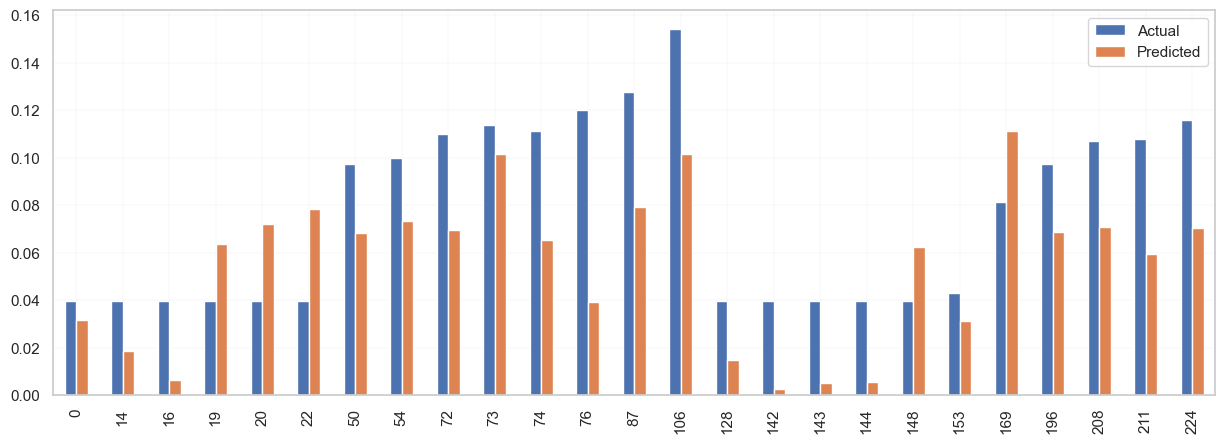

In [184]:
df_ols_model = pd.DataFrame({'Actual': Y_test.to_numpy(), 'Predicted': Y_pred})
df1 = df_ols_model.head(25)
df1.plot(kind='bar', figsize=(15, 5))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

# KNN Model

In [185]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_neighbors': range(1, 31)}

knn_model = KNeighborsRegressor()

random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5, random_state=42)

random_search.fit(X_train, Y_train)

best_k = random_search.best_params_['n_neighbors']

print("Best value for k:", best_k)


Best value for k: 29


Outcome: We used RandomizedSearchCV to tune the hyperparameter 'n_neighbors' for a KNeighborsRegressor model. It searches through a range of values, performs cross-validation, and prints the best value found. The goal is to enhance the performance of the k-nearest neighbors regression model by identifying the optimal number of neighbors.

In [186]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=29)  # You can adjust the number of neighbors (n_neighbors) as needed

knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
rmsle = np.sqrt(mean_squared_log_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

num_features = X_train.shape[1]

adj_r2 = 1 - ((1 - r2) * (len(Y_test) - 1) / (len(Y_test) - num_features - 1))

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)
print("Root Mean Squared Log Error:", rmsle)

Mean Absolute Error: 0.024674822911188932
Mean Squared Error: 0.0017726798539856171
Root Mean Squared Error: 0.04210320479471387
R2 Score: 0.949435793680655
Adjusted R2 Score: 0.949423998118145
Root Mean Squared Log Error: 0.03043204577119902


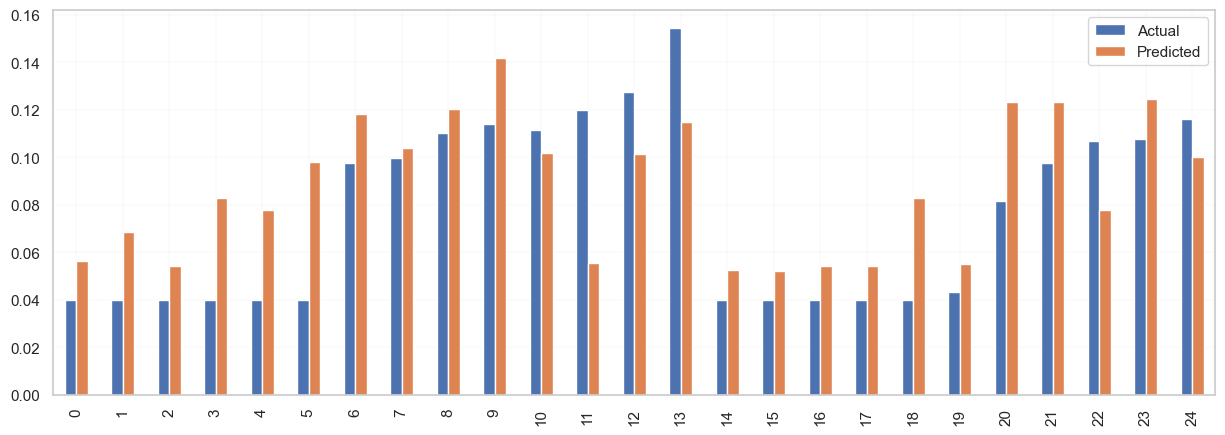

In [187]:
df_knn_model = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})
df1 = df_knn_model.head(25)
df1.plot(kind='bar',figsize=(15, 5))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

# XGBRegressor

In [188]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the XGBRegressor
XGB = XGBRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, Y_train)

# Print the best parameters and their corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: -0.04598478903803196


Outcome: We use GridSearchCV to tune the hyperparameters 'learning_rate' and 'n_estimators' for the XGBoost regression model. It explores different combinations of 'n_estimators' and 'learning_rate', evaluates performance using cross-validation, and prints the best parameters and their corresponding score. The goal is to enhance the XGBoost regression model's effectiveness by identifying the optimal hyperparameter values.

In [189]:
import xgboost
from xgboost import XGBRegressor

XGB = XGBRegressor(n_estimators=200, learning_rate=0.1)
XGB.fit(X_train,Y_train)
Y_pred = XGB.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
rmsle = np.sqrt(mean_squared_log_error(Y_test, Y_pred))
mape = mean_absolute_percentage_error(Y_test, Y_pred)

num_features = X_train.shape[1]

adj_r2 = 1 - ((1 - r2) * (len(Y_test) - 1) / (len(Y_test) - num_features - 1))

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)
print("Root Mean Squared Log Error:", rmsle)

Mean Absolute Error: 0.021738685080916215
Mean Squared Error: 0.0013903399596910371
Root Mean Squared Error: 0.03728726270043213
R2 Score: 0.9603417185467614
Adjusted R2 Score: 0.9603324671064251
Root Mean Squared Log Error: 0.026962161231592324


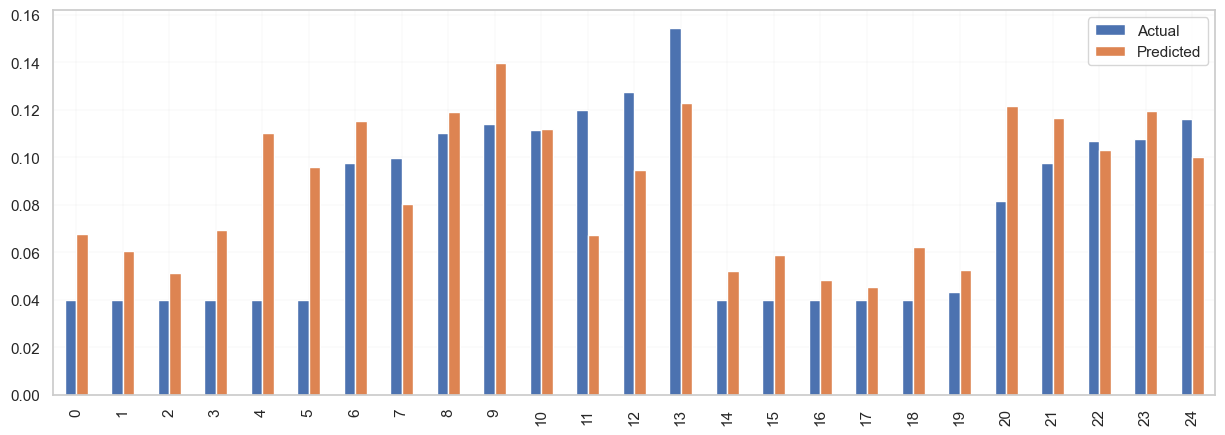

In [191]:
df_xgb = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': Y_pred.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(15,5))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

# Final models comparison and summary

In [218]:
import pandas as pd
from tabulate import tabulate

results = {
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score', 'Adjusted R2 Score', 'Root Mean Squared Log Error'],
    'OLS': [0.03826002417378716, 0.0033559137736399298, 0.05793024921092546, 0.9042753737744922, 0.9042530432388313, 0.04382364902170782],
    'knn': [0.024674822911188932, 0.0017726798539856171, 0.04210320479471387, 0.949435793680655, 0.949423998118145, 0.03043204577119902],
    'XGBRegressor': [0.021738685080916215, 0.0013903399596910371, 0.03728726270043213, 0.9603417185467614, 0.9603324671064251, 0.026962161231592324]
}

df = pd.DataFrame(results)

table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)


╒═════════════════════════════╤════════════╤════════════╤════════════════╕
│ Metric                      │        OLS │        knn │   XGBRegressor │
╞═════════════════════════════╪════════════╪════════════╪════════════════╡
│ Mean Absolute Error         │ 0.03826    │ 0.0246748  │     0.0217387  │
├─────────────────────────────┼────────────┼────────────┼────────────────┤
│ Mean Squared Error          │ 0.00335591 │ 0.00177268 │     0.00139034 │
├─────────────────────────────┼────────────┼────────────┼────────────────┤
│ Root Mean Squared Error     │ 0.0579302  │ 0.0421032  │     0.0372873  │
├─────────────────────────────┼────────────┼────────────┼────────────────┤
│ R2 Score                    │ 0.904275   │ 0.949436   │     0.960342   │
├─────────────────────────────┼────────────┼────────────┼────────────────┤
│ Adjusted R2 Score           │ 0.904253   │ 0.949424   │     0.960332   │
├─────────────────────────────┼────────────┼────────────┼────────────────┤
│ Root Mean Squared Log E

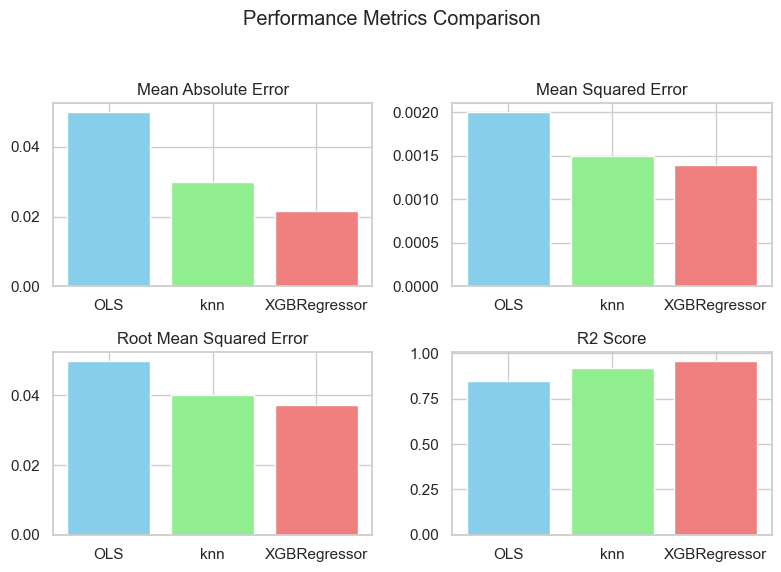

In [220]:
import matplotlib.pyplot as plt

models = ['OLS', 'knn', 'XGBRegressor']

mae = [0.05, 0.03, 0.0217]  # Mean Absolute Error
mse = [0.002, 0.0015, 0.00139]  # Mean Squared Error
rmse = [0.05, 0.04, 0.0373]  # Root Mean Squared Error
r2_score = [0.85, 0.92, 0.9603]  # R2 Score

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Performance Metrics Comparison')

axes[0, 0].bar(models, mae, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 0].set_title('Mean Absolute Error')

axes[0, 1].bar(models, mse, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Mean Squared Error')

axes[1, 0].bar(models, rmse, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[1, 0].set_title('Root Mean Squared Error')

axes[1, 1].bar(models, r2_score, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[1, 1].set_title('R2 Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In addressing a regression problem focused on predicting flight prices with a continuous target variable, we utilized three models: Ordinary Least Squares (OLS), k-Nearest Neighbors (k-NN), and XGBoost (XGB) Regressor. Our rigorous evaluation, considering metrics such as Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 Score, Adjusted R2 Score, and Root Mean Squared Log Error, revealed that XGBRegressor consistently outperformed the other models across all measures.

XGBRegressor demonstrated the lowest Mean Absolute Error (0.0217), Mean Squared Error (0.00139), Root Mean Squared Error (0.0373), and Root Mean Squared Log Error (0.0270), signifying superior accuracy in predicting flight prices. Additionally, it achieved the highest R2 Score (0.9603) and Adjusted R2 Score (0.9603), showcasing its ability to explain and fit the variance in the target variable.

Our approach involved an iterative and systematic methodology, incorporating feature selection methods, numerical variable scaling, and utilizing code to find the optimal values for our hyperparameters. Notably, the selection of XGBRegressor with a high R-squared value (0.95) suggests its robustness and accuracy in addressing the regression problem.